# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang
(tulis di sini)
## Tujuan Penelitian
(tulis di sini)
## Rumusan Masalah
Bagaimana mengidentifikasi pola-pola transaksi yang mencurigakan dalam data kartu kredit?
## Data yang akan dipakai
- Nama: Credit Card Fraud Detection Dataset
- Sumber Data: Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud)
- Deskripsi Data: Dataset ini berisi transaksi kartu kredit yang mencakup periode dua hari, di mana terdapat transaksi yang dilakukan oleh pemilik kartu kredit yang melakukan penipuan. Dataset ini memiliki 30 fitur numerik yang merupakan hasil dari reduksi dimensi PCA, sehingga deskripsi asli dari fitur-fitur ini tidak dapat disediakan karena alasan keamanan. Selain itu, dataset ini juga memiliki fitur 'Time' dan 'Amount'.
## Metode
Melatih beberapa model machine learning seperti Logistic Regression, Random Forest, Gradient Boosting dan k nearest neighbor untuk memprediksi penipuan kartu kredit.

# Preparation | Persiapan
## Import Libraries

In [6]:
# visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# save model 
import joblib

## Get Data | Mendapatkan Data

In [7]:
# Membaca dataset
data = pd.read_csv("./creditcard.csv")

## Explore Data (EDA) | Eksplorasi Data

In [8]:
# Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Menampilkan statistik deskriptif
data[["Time", "Class", "Amount"]].describe()

,Time,Class,Amount
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.001727,88.349619
std,47488.145955,0.041527,250.120109
min,0.000000,0.000000,0.000000
25%,54201.500000,0.000000,5.600000
50%,84692.000000,0.000000,22.000000
75%,139320.500000,0.000000,77.165000
max,172792.000000,1.000000,25691.160000


In [10]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

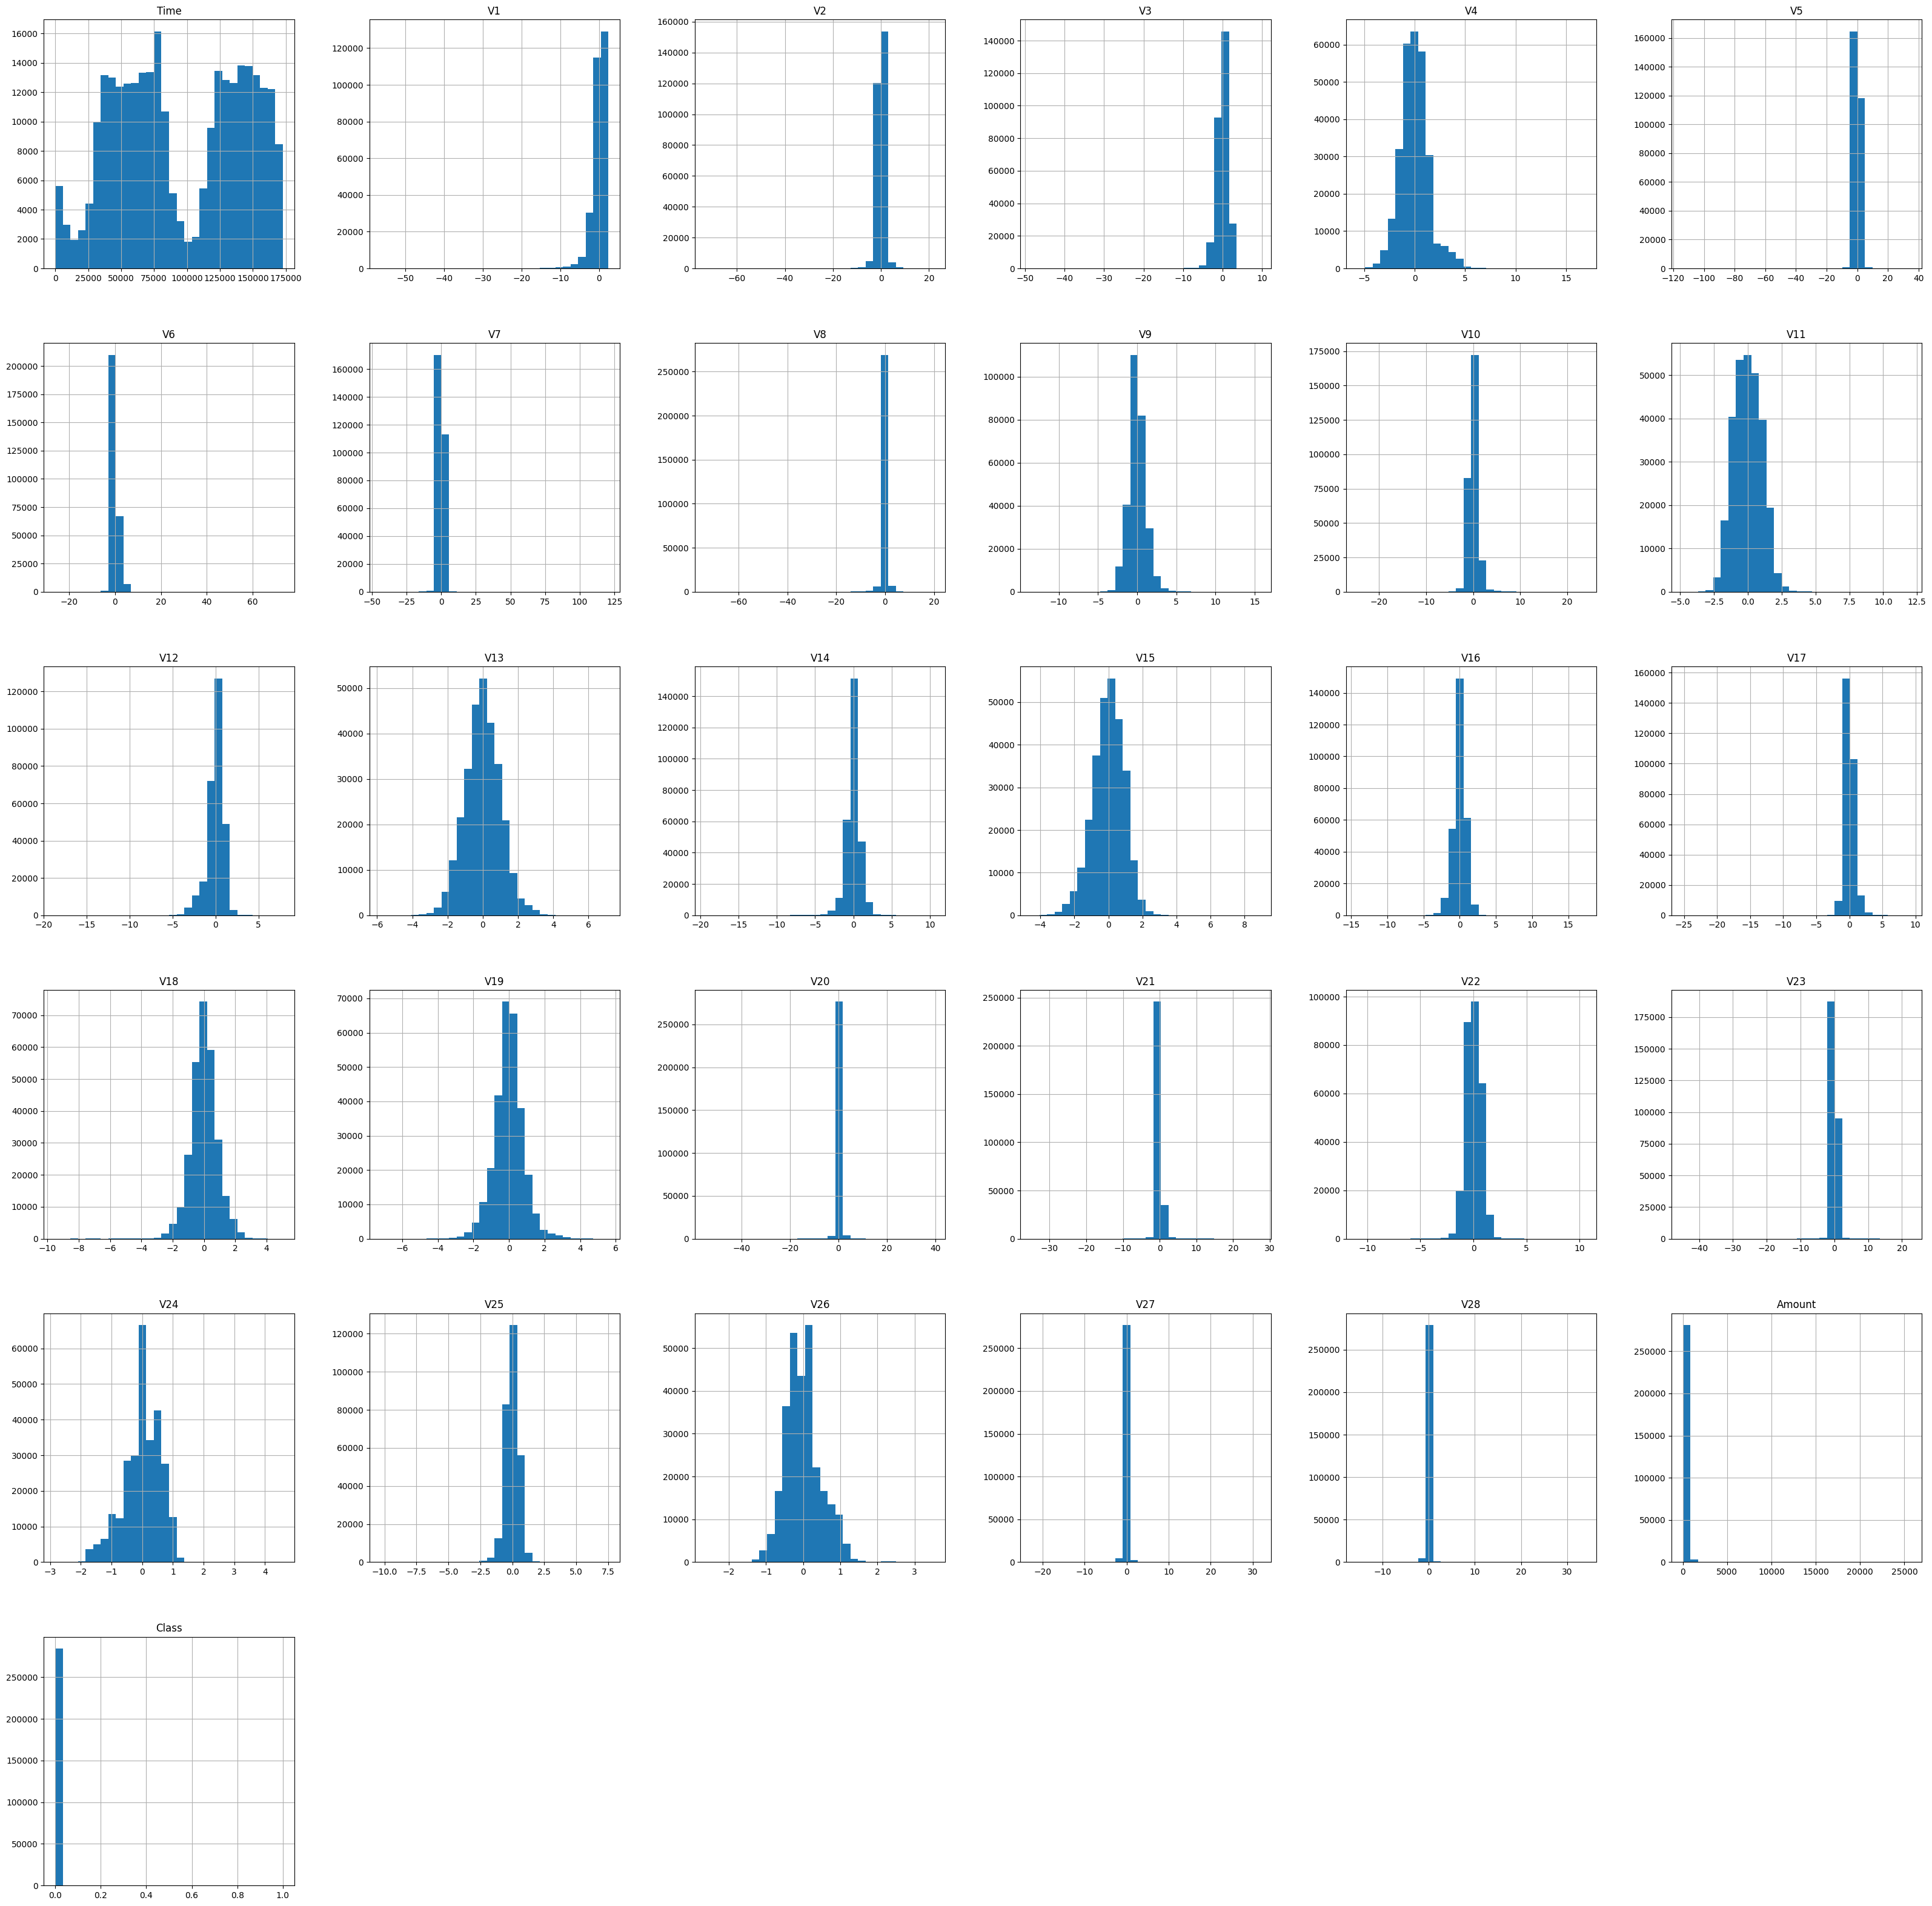

In [11]:
data.hist(bins=30, figsize=(40, 40))

In [12]:
new_data = data.copy()

total_duplicate = new_data.duplicated().sum()
total_na = new_data.isna().sum().sum()
total_null = new_data.isnull().sum().sum()

print(f"Total duplicate data: {total_duplicate}")
print(f"Total NA data: {total_na}")
print(f"Total NULL data: {total_null}")

Total duplicate data: 1081
Total NA data: 0
Total NULL data: 0


## Clean Data | Membersihkan Data

In [13]:
new_data.drop_duplicates(inplace=True)
new_data.dropna(inplace=True)

print(f"Total baris sebelum dihapus: {len(data)}")
print(f"Total baris setelah dihapus: {len(new_data)}")

Total baris sebelum dihapus: 284807
Total baris setelah dihapus: 283726


# Model Training | Pelatihan Model

In [14]:
# Memisahkan fitur dan target
X = new_data.drop('Class', axis=1)
y = new_data['Class']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalisasi fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
# Melatih model Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [118]:
# Melatih model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
# Melatih model Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [16]:
# Melatih model k nearest neighbors
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
# save model 
joblib.dump(lr_model, "./model/lr_model.joblib")
joblib.dump(rf_model, "./model/rf_model.joblib")
joblib.dump(gb_model, "./model/gb_model.joblib")
joblib.dump(knn_model, "./model/knn_model.joblib")

['./model/knn_model.joblib']

In [18]:
# load model 
lr_model = joblib.load("./model/lr_model.joblib")
rf_model = joblib.load("./model/rf_model.joblib")
gb_model = joblib.load("./model/gb_model.joblib")
knn_model = joblib.load("./model/knn_model.joblib")

# Model Evaluation | Evaluasi Model

Logistic Regression:
Accuracy: 0.9991893701758714
Precision: 0.8928571428571429
Recall: 0.5555555555555556
F1 Score: 0.684931506849315
Confusion Matrix:


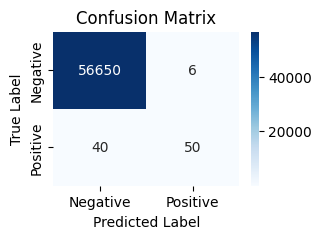

In [20]:
# Evaluasi model Logistic Regression
lr_pred = lr_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))

print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Random Forest:
Accuracy: 0.9995418179254926
Precision: 0.9848484848484849
Recall: 0.7222222222222222
F1 Score: 0.8333333333333334
Confusion Matrix:


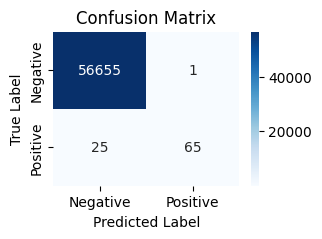

In [21]:
# Evaluasi model Random Forest
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))

print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Gradient Boosting:
Accuracy: 0.9993127268882388
Precision: 0.9047619047619048
Recall: 0.6333333333333333
F1 Score: 0.7450980392156863
Confusion Matrix:


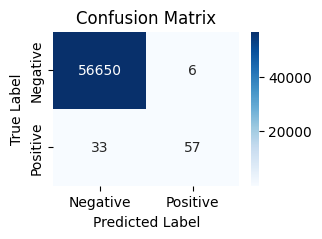

In [22]:
# Evaluasi model Gradient Boosting
gb_pred = gb_model.predict(X_test)
print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Precision:", precision_score(y_test, gb_pred))
print("Recall:", recall_score(y_test, gb_pred))
print("F1 Score:", f1_score(y_test, gb_pred))

print("Confusion Matrix:")
cm_gb = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


K Nearest Neigbour:
Accuracy: 0.9995241955380115
Precision: 0.9846153846153847
Recall: 0.7111111111111111
F1 Score: 0.8258064516129032
Confusion Matrix:


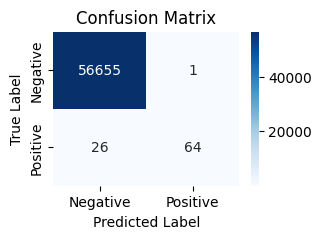

In [23]:
# Evaluasi model KNN
knn_pred = knn_model.predict(X_test)
print("\nK Nearest Neigbour:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))

print("Confusion Matrix:")
cm_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Model Selection | Pemilihan Model

In [27]:
# table summary accuracy, precision, recall, f1 score dari model
summary = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'K Nearest Neigbour'],
    'Accuracy': [accuracy_score(y_test, lr_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, gb_pred), accuracy_score(y_test, knn_pred)],
    'Precision': [precision_score(y_test, lr_pred), precision_score(y_test, rf_pred), precision_score(y_test, gb_pred), precision_score(y_test, knn_pred)],
    'Recall': [recall_score(y_test, lr_pred), recall_score(y_test, rf_pred), recall_score(y_test, gb_pred), recall_score(y_test, knn_pred)],
    'F1 Score': [f1_score(y_test, lr_pred), f1_score(y_test, rf_pred), f1_score(y_test, gb_pred), f1_score(y_test, knn_pred)],
    'Confusion Matrix': [cm_lr, cm_rf, cm_gb, cm_knn]
}

summary_df = pd.DataFrame(summary)
summary_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.999189,0.892857,0.555556,0.684932,"[[56650, 6], [40, 50]]"
1,Random Forest,0.999542,0.984848,0.722222,0.833333,"[[56655, 1], [25, 65]]"
2,Gradient Boosting,0.999313,0.904762,0.633333,0.745098,"[[56650, 6], [33, 57]]"
3,K Nearest Neigbour,0.999524,0.984615,0.711111,0.825806,"[[56655, 1], [26, 64]]"


Berdasarkan evaluasi model, Random Forest memiliki kinerja yang paling baik dengan akurasi sebesar 0.999542, presisi sebesar 0.984848, recall sebesar 0.722222, dan F1 Score sebesar 0.833333. Oleh karena itu, model Random Forest dipilih sebagai model yang paling cocok untuk deteksi penipuan kartu kredit.

## Conclusion | Kesimpulan

Berhasil mengembangkan model machine learning untuk mendeteksi transaksi kartu kredit yang mencurigakan. Model ini dapat memberikan prediksi dengan tingkat akurasi yang tinggi, sehingga dapat membantu lembaga keuangan dalam mengidentifikasi dan mencegah kerugian akibat penipuan kartu kredit. 